In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.utils import resample

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55583 non-null  int64  
 1   accommodates            55583 non-null  int64  
 2   amenities               55583 non-null  object 
 3   bathrooms               55436 non-null  float64
 4   bed_type                55583 non-null  object 
 5   bedrooms                55512 non-null  float64
 6   beds                    55487 non-null  float64
 7   cancellation_policy     55583 non-null  object 
 8   city                    55583 non-null  object 
 9   cleaning_fee            55583 non-null  object 
 10  description             55583 non-null  object 
 11  first_review            43675 non-null  object 
 12  host_has_profile_pic    55435 non-null  object 
 13  host_identity_verified  55435 non-null  object 
 14  host_response_rate      41879 non-null

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18528 entries, 0 to 18527
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      18528 non-null  int64  
 1   accommodates            18528 non-null  int64  
 2   amenities               18528 non-null  object 
 3   bathrooms               18475 non-null  float64
 4   bed_type                18528 non-null  object 
 5   bedrooms                18508 non-null  float64
 6   beds                    18493 non-null  float64
 7   cancellation_policy     18528 non-null  object 
 8   city                    18528 non-null  object 
 9   cleaning_fee            18528 non-null  object 
 10  description             18528 non-null  object 
 11  first_review            14572 non-null  object 
 12  host_has_profile_pic    18488 non-null  object 
 13  host_identity_verified  18488 non-null  object 
 14  host_response_rate      13933 non-null

In [6]:
train.describe()

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y
count,55583.000000,55583.000000,55436.000000,55512.000000,55487.000000,55583.000000,55583.000000,55583.000000,43027.000000,55583.000000
mean,27791.000000,3.152906,1.236426,1.265312,1.711770,38.450812,-92.342406,20.937283,94.077928,160.163647
std,16045.574343,2.153001,0.583074,0.849319,1.257822,3.080869,21.687844,37.951889,7.802154,168.087140
min,0.000000,1.000000,0.000000,0.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,1.000000
25%,13895.500000,2.000000,1.000000,1.000000,1.000000,34.128205,-118.341876,1.000000,92.000000,74.000000
50%,27791.000000,2.000000,1.000000,1.000000,1.000000,40.663312,-76.995602,6.000000,96.000000,111.000000
75%,41686.500000,4.000000,1.000000,1.000000,2.000000,40.746146,-73.954703,23.000000,100.000000,185.000000
max,55582.000000,16.000000,8.000000,10.000000,18.000000,42.390437,-70.999166,605.000000,100.000000,1999.000000


In [7]:
train.isnull().sum()

id                            0
accommodates                  0
amenities                     0
bathrooms                   147
bed_type                      0
bedrooms                     71
beds                         96
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              11908
host_has_profile_pic        148
host_identity_verified      148
host_response_rate        13704
host_since                  148
instant_bookable              0
last_review               11880
latitude                      0
longitude                     0
name                          0
neighbourhood              5160
number_of_reviews             0
property_type                 0
review_scores_rating      12556
room_type                     0
thumbnail_url              6145
zipcode                     716
y                             0
dtype: int64

In [8]:
test.isnull().sum()

id                           0
accommodates                 0
amenities                    0
bathrooms                   53
bed_type                     0
bedrooms                    20
beds                        35
cancellation_policy          0
city                         0
cleaning_fee                 0
description                  0
first_review              3956
host_has_profile_pic        40
host_identity_verified      40
host_response_rate        4595
host_since                  40
instant_bookable             0
last_review               3947
latitude                     0
longitude                    0
name                         0
neighbourhood             1712
number_of_reviews            0
property_type                0
review_scores_rating      4166
room_type                    0
thumbnail_url             2071
zipcode                    250
dtype: int64

In [9]:
print(f"Duplicated in train set : {train.duplicated().sum()}, ({np.round(train.duplicated().sum()*100/len(train), 1)}%)")
print(f"Duplicated in test set : {test.duplicated().sum()}, ({np.round(test.duplicated().sum()*100/len(test), 1)}%)")

Duplicated in train set : 0, (0.0%)
Duplicated in test set : 0, (0.0%)


In [10]:
train.nunique()

id                        55583
accommodates                 16
amenities                 51031
bathrooms                    17
bed_type                      5
bedrooms                     11
beds                         18
cancellation_policy           5
city                          6
cleaning_fee                  2
description               55221
first_review               2446
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           78
host_since                 3047
instant_bookable              2
last_review                1298
latitude                  55583
longitude                 55583
name                      55152
neighbourhood               607
number_of_reviews           351
property_type                34
review_scores_rating         53
room_type                     3
thumbnail_url             49431
zipcode                     737
y                           714
dtype: int64

In [11]:
train.dtypes

id                          int64
accommodates                int64
amenities                  object
bathrooms                 float64
bed_type                   object
bedrooms                  float64
beds                      float64
cancellation_policy        object
city                       object
cleaning_fee               object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
property_type              object
review_scores_rating      float64
room_type                  object
thumbnail_url              object
zipcode                    object
y                         float64
dtype: object

Target variable : Distribution of y

C:\Users\yaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : 4.264338
Kurtosis : 26.030945


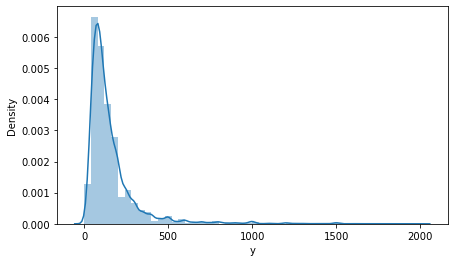

In [15]:
plt.figure(figsize=(7, 4))
sns.distplot(train["y"])

print("Skewness : %f" % train["y"].skew())
print("Kurtosis : %f" % train["y"].kurt())

C:\Users\yaga\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : 0.512283
Kurtosis : 0.664186


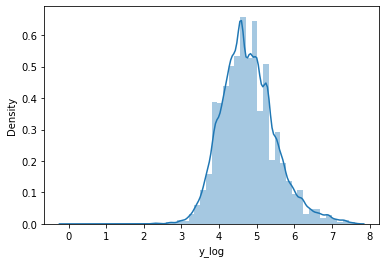

In [16]:
train["y_log"] = np.log(train["y"])

sns.distplot(train["y_log"])
print("Skewness : %f" % train["y_log"].skew())
print("Kurtosis : %f" % train["y_log"].kurt())

Numerical and Categorical features

In [17]:
numerical_feats = train.dtypes[train.dtypes != "object"].index
print("Number of Numerical features : ", len(numerical_feats))
categorical_feats = train.dtypes[train.dtypes == "object"].index
print("Number of Categorical features : ", len(categorical_feats))

Number of Numerical features :  11
Number of Categorical features :  19


In [20]:
print(train[numerical_feats].columns)
print("*"*100)
print(train[categorical_feats].columns)

Index(['id', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating', 'y', 'y_log'],
      dtype='object')
****************************************************************************************************
Index(['amenities', 'bed_type', 'cancellation_policy', 'city', 'cleaning_fee',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'name', 'neighbourhood',
       'property_type', 'room_type', 'thumbnail_url', 'zipcode'],
      dtype='object')


In [21]:
train[numerical_feats].head()

,id,accommodates,bathrooms,bedrooms,beds,latitude,longitude,number_of_reviews,review_scores_rating,y,y_log
0,0,6,2.0,1.0,4.0,33.788931,-118.154761,1,60.0,138.0,4.927254
1,1,2,1.0,1.0,1.0,38.934810,-76.978190,9,100.0,42.0,3.737670
2,2,2,2.0,1.0,1.0,40.695118,-73.926240,27,83.0,65.0,4.174387
3,3,2,1.0,1.0,1.0,37.796728,-122.411906,38,95.0,166.0,5.111988
4,4,2,1.0,1.0,1.0,40.785050,-73.974691,5,100.0,165.0,5.105945


In [22]:
train[categorical_feats].head()

,amenities,bed_type,cancellation_policy,city,cleaning_fee,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,property_type,room_type,thumbnail_url,zipcode
0,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",Real Bed,flexible,LA,t,My place is meant for family and a few friends...,2016-07-27,t,f,NaN,2016-07-13,f,2016-07-27,The Penthouse,NaN,Apartment,Private room,NaN,90804
1,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,strict,DC,t,This is a new listing for a lovely guest bedro...,2016-09-12,t,t,100%,2015-12-30,f,2017-03-31,Guest Bedroom in Brookland,Brookland,House,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018
2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",Real Bed,strict,NYC,t,We're looking forward to your stay at our apt....,2016-06-15,t,f,100%,2016-05-21,t,2017-08-13,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,Apartment,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN
3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,strict,SF,t,BEST CITY VIEWS - - ROOF DECK W/ BBQ & WiFi - ...,2014-03-15,t,t,100%,2012-06-19,t,2017-09-03,BEST views + reviews! 5/5 stars*****,Nob Hill,Apartment,Private room,NaN,94133
4,"{TV,Internet,""Wireless Internet"",""Air conditio...",Real Bed,strict,NYC,t,Charming Apartment on the upper west side of M...,2015-08-05,t,t,100%,2015-03-25,f,2017-09-10,Charming 1-bedroom - UWS Manhattan,Upper West Side,Apartment,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024


In [24]:
total_nan = train.isnull().sum().sort_values(ascending=False)
percent_nan = (train.isnull().sum()/len(train)).sort_values(ascending=False)
missing_data = pd.concat([total_nan, percent_nan], axis=1, keys=["Total", "Percent"])
missing_data

,Total,Percent
host_response_rate,13704,0.246550
review_scores_rating,12556,0.225896
first_review,11908,0.214238
last_review,11880,0.213734
thumbnail_url,6145,0.110555
neighbourhood,5160,0.092834
zipcode,716,0.012882
host_since,148,0.002663
host_identity_verified,148,0.002663
host_has_profile_pic,148,0.002663
